In [2]:
import pandas as pd
import pyodide_http
pyodide_http.patch_all()
# Load in the data.
df = pd.read_csv(''https://raw.githubusercontent.com/Kil0-ui/diabetes-predictor-notebook/main/content/diabetes.csv');
# Clean the data. BMI has 0s in some rows, so we remove them
df = df.loc[~((df['BMI'] == 0))]

In [3]:
import micropip
# Dynamically install jinja for visuals
await micropip.install("jinja2")

# Use a correlation matrix to determine what columns in the data correspond to an outcome of 1
df.corr().style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127176,0.153660,-0.078353,-0.072941,0.021719,-0.026586,0.547046,0.216472
Glucose,0.127176,1.000000,0.134615,0.049609,0.328716,0.219290,0.134286,0.258243,0.465906
BloodPressure,0.153660,0.134615,1.000000,0.181390,0.073019,0.194328,0.020758,0.225494,0.052585
SkinThickness,-0.078353,0.049609,0.181390,1.000000,0.431953,0.384586,0.178053,-0.117089,0.072072
Insulin,-0.072941,0.328716,0.073019,0.431953,1.000000,0.185357,0.182980,-0.044188,0.128888
BMI,0.021719,0.219290,0.194328,0.384586,0.185357,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.026586,0.134286,0.020758,0.178053,0.182980,0.155382,1.000000,0.034416,0.179615
Age,0.547046,0.258243,0.225494,-0.117089,-0.044188,0.025841,0.034416,1.000000,0.236029
Outcome,0.216472,0.465906,0.052585,0.072072,0.128888,0.313680,0.179615,0.236029,1.000000


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Use columns Pregnencies, Glucose, BMI, Age to build model as the are the primary columns that correspond heavily to an outcome of 1
X = df.drop(columns=['Outcome', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction'])
y = df['Outcome']

# Train on 80% of the data and test with 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2);

model = LogisticRegression();
model.fit(X_train, y_train);

In [5]:
from sklearn import metrics

# Make predictions
predictions = model.predict(X_test)
# Measure the accuracy of our predictions based on the actual outcome, which is held in y_test
acc = metrics.accuracy_score(y_test, predictions)

# Print precentage accuracy
acc

0.7171052631578947

In [6]:
X_test

,Pregnancies,Glucose,BMI,Age
756,7,137,32.0,39
595,0,188,32.0,22
178,5,143,45.0,47
524,3,125,31.6,24
17,7,107,29.6,31
...,...,...,...,...
263,3,142,32.4,63
591,2,112,39.4,24
138,0,129,31.2,29
174,2,75,29.7,33


In [7]:
y_test

756    0
595    1
178    0
524    0
17     1
      ..
263    0
591    0
138    0
174    0
736    0
Name: Outcome, Length: 152, dtype: int64

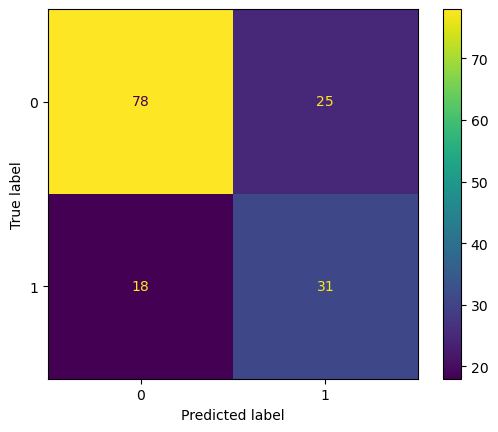

In [8]:
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_test, predictions);

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()
plt.show()

In [9]:
#import joblib

#joblib.dump(model, "diabetes-risk-predictor.joblib")